In [621]:
import pandas as pd
import matplotlib.pyplot as plt

In [622]:
df = pd.read_csv("data_preprocessed.csv")
df.head()

,customer_id,age,gender_cd,region_size,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,partnership_flg,child_amt,...,emp_gender_cd,emp_children_cnt,emp_work_months_cnt,emp_citizenship_country_cd,emp_marital_status_cd,day_of_week,holiday_flg,million_city,child_flg,approval_flg
0,139895392,42.0,1.0,msk,0.0,0.0,1.0,0.0,1.0,0.0,...,NaN,NaN,0.0,NaN,NaN,2,0,1.0,0,0
1,342841087,40.0,0.0,town,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,NaN,82.0,NaN,NaN,4,0,0.0,1,0
2,104017416,30.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,6,1,NaN,0,0
3,579880064,65.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,4,0,NaN,0,0
4,124379737,28.0,1.0,msk,0.0,0.0,1.0,0.0,1.0,1.0,...,NaN,NaN,0.0,NaN,NaN,4,0,1.0,1,0


In [623]:
df.shape

(18691, 34)

In [624]:
df_final = pd.read_csv("final.csv")

In [625]:
df_final["bundle_nm"] = df_final["bundle_nm"].fillna('Без подписки')
df_final["bundle_nm"] = df_final["bundle_nm"].replace('XXX', 'Без подписки')
df_final['approval_flg'] = df_final['wo_hit_status_result_desc'].map({'Дозвон, Отказ': 0, 'Дозвон, Успешно': 1}) # создание флага одобрения заявки

In [626]:
df_final.groupby("bundle_nm")["approval_flg"].mean()

bundle_nm
Premium         0.131757
Pro             0.119383
Без подписки    0.132390
Name: approval_flg, dtype: float64

In [627]:
df.shape

(18691, 34)

In [628]:
(df.isna().sum() / df.shape[0]).sort_values()[::-1]

emp_children_cnt              0.995399
confirmed_income              0.924723
emp_citizenship_country_cd    0.905195
emp_marital_status_cd         0.895351
predicted_income              0.781339
region_size                   0.389974
partnership_flg               0.389974
traveler_flg                  0.389974
auto_flg                      0.389974
entrepreneur_flg              0.389974
foreign_flg                   0.389974
segment_cd                    0.389974
realty_type                   0.389974
million_city                  0.389974
child_amt                     0.389974
emp_gender_cd                 0.116634
emp_work_months_cnt           0.095447
gender_cd                     0.013803
age                           0.009791
state_talk_time_sec           0.007918
emp_age                       0.000054
emp_age_new                   0.000054
approval_flg                  0.000000
functional_cd                 0.000000
bundle_nm                     0.000000
product_cd               

In [629]:
df[~(df.isin(["confirmed_income", "emp_children_cnt", "emp_citizenship_country_cd", ""]))].dropna().shape

(1, 34)

In [630]:
df["emp_age_new"].isna().sum()

1

In [631]:
df["functional_cd"].value_counts() / df["functional_cd"].shape[0] * 100

functional_cd
Preapprove       48.285271
Afterfilling     12.583596
Utilization       9.186239
Cold              8.223209
Upsell            7.179926
Meeting           5.692579
Agreement         2.926542
Incoming          1.931411
Downsell          1.225189
Reutilization     1.219838
Activation        0.513616
BAF               0.454764
Prolongation      0.262158
Autoleads         0.251458
Deposit           0.058852
Refinancing       0.005350
Name: count, dtype: float64

In [632]:
df = df[df['functional_cd'].isin(['Preapprove', 'Afterfilling', 'Utilization', 'Cold', 'Upsell', 'Meeting'])]

In [633]:
df["bundle_nm"].isna().sum()

0

In [634]:
df["bundle_nm"].value_counts()

bundle_nm
Без подписки    12894
Pro              3888
Premium           255
Name: count, dtype: int64

In [635]:
df["bundle_nm"] = df["bundle_nm"].replace({"XXX": "Без подписки", "0": "Без подписки"})

In [636]:
df["bundle_nm"].value_counts()

bundle_nm
Без подписки    12894
Pro              3888
Premium           255
Name: count, dtype: int64

In [637]:
df = df.loc[df["bundle_nm"] != 'Premium']

In [638]:
df["bundle_nm"].value_counts()

bundle_nm
Без подписки    12894
Pro              3888
Name: count, dtype: int64

In [639]:
df["bundle_flg"] = df["bundle_nm"] == "Pro"

# Влияние подписки в продуктах и причинах

In [640]:
df = pd.read_csv("data_final_preprocessed.csv")
df = df.loc[df["bundle_nm"] != 'Premium']

In [641]:
df = df[df['functional_cd'].isin(['Preapprove', 'Afterfilling', 'Utilization', 'Cold', 'Upsell', 'Meeting'])]
# df = df[df['functional_cd'].isin(['Preapprove', 'Afterfilling', 'Utilization', 'Cold', 'Upsell', 'Meeting'])].dropna(subset=["traveler_flg"])

In [642]:
from scipy.stats import chi2_contingency, fisher_exact
filtered_data = df.copy()
# filtered_data = df[df['functional_cd'].isin(['Meeting', 'Upsell'])]
grouped = filtered_data.groupby(['functional_cd', 'product_cd', 'bundle_nm']).size().reset_index(name='group_size')


In [643]:
grouped[grouped['group_size'] < 20]

,functional_cd,product_cd,bundle_nm,group_size
0,Afterfilling,Car Loan,Pro,1
1,Afterfilling,Car Loan,Без подписки,2
10,Afterfilling,Investment,Pro,5
11,Afterfilling,Investment,Без подписки,9
14,Afterfilling,Mortgage Insurance,Pro,17
15,Afterfilling,Mortgage Insurance,Без подписки,19
16,Afterfilling,Secured Loan,Pro,5
17,Afterfilling,Secured Loan,Без подписки,10
18,Cold,Car Loan,Без подписки,1
19,Cold,Casco,Pro,4


In [644]:
filtered_data = df.copy()
# filtered_data = df[df['functional_cd'].isin(['Meeting', 'Upsell'])]
grouped = filtered_data.groupby(['functional_cd', 'product_cd', 'bundle_nm']).size().reset_index(name='group_size')

valid_products = (
    grouped.groupby(['product_cd', 'functional_cd'])['group_size']
    .min()
    .reset_index()
    .query('group_size >= 20')
)
valid_products

,product_cd,functional_cd,group_size
2,Car Loan,Preapprove,22
3,Casco,Afterfilling,124
5,Cash Loan,Afterfilling,45
7,Cash Loan,Preapprove,344
8,Cash Loan,Upsell,226
9,Credit Cards,Afterfilling,72
10,Credit Cards,Meeting,92
11,Credit Cards,Preapprove,1230
12,Credit Cards,Utilization,111
13,Debit Cards,Afterfilling,23


In [645]:
valid_combinations = valid_products[['product_cd', 'functional_cd']]
valid_combinations

,product_cd,functional_cd
2,Car Loan,Preapprove
3,Casco,Afterfilling
5,Cash Loan,Afterfilling
7,Cash Loan,Preapprove
8,Cash Loan,Upsell
9,Credit Cards,Afterfilling
10,Credit Cards,Meeting
11,Credit Cards,Preapprove
12,Credit Cards,Utilization
13,Debit Cards,Afterfilling


In [646]:
filtered_valid_data = filtered_data.merge(valid_combinations, on=['product_cd', 'functional_cd'])
filtered_valid_data

,customer_id,age,gender_cd,region_size,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,partnership_flg,child_amt,...,emp_gender_cd,emp_children_cnt,emp_work_months_cnt,emp_citizenship_country_cd,emp_marital_status_cd,day_of_week,holiday_flg,million_city,child_flg,approval_flg
0,139895392,42.0,1.0,msk,0.0,0.0,1.0,0.0,1.0,0.0,...,NaN,NaN,0.0,NaN,NaN,2,0,1.0,0,0
1,104017416,30.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,6,1,NaN,0,0
2,579880064,65.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,4,0,NaN,0,0
3,124379737,28.0,1.0,msk,0.0,0.0,1.0,0.0,1.0,1.0,...,NaN,NaN,0.0,NaN,NaN,4,0,1.0,1,0
4,505902204,19.0,1.0,town,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,NaN,1.0,Россия,Холост/не замужем,0,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14371,139422099,31.0,0.0,town,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,NaN,23.0,NaN,NaN,1,0,0.0,0,0
14372,265874391,48.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,80.0,NaN,NaN,2,0,NaN,0,0
14373,305282509,39.0,0.0,urban,0.0,1.0,0.0,0.0,1.0,2.0,...,NaN,NaN,1.0,NaN,NaN,3,0,1.0,1,1
14374,191420290,48.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,0.0,NaN,NaN,1,0,NaN,0,0


In [647]:
# Проверка статистической значимости
results = []
for (reason, product), group in filtered_valid_data.groupby(["functional_cd", "product_cd"]):
    # Таблица сопряженности
    contingency_table = pd.crosstab(group['bundle_nm'], group['approval_flg'])
    # Выбор теста (хи-квадрат или Фишера)
    if contingency_table.values.min() < 5:
        # Точный тест Фишера
        stat, p_value = fisher_exact(contingency_table, alternative='two-sided')
        test_type = 'Fisher'
    else:
        # Тест хи-квадрат
        stat, p_value, _, _ = chi2_contingency(contingency_table)
        test_type = 'Chi2'
    
    # Сохранение результата
    results.append({
        'reason': reason,
        'product': product,
        'test': test_type,
        'p_value': p_value,
        'significant': p_value < 0.05
    })

# Конвертация результатов в DataFrame
results_df = pd.DataFrame(results)

results_df

,reason,product,test,p_value,significant
0,Afterfilling,Casco,Chi2,0.385052,False
1,Afterfilling,Cash Loan,Chi2,0.421823,False
2,Afterfilling,Credit Cards,Fisher,0.286997,False
3,Afterfilling,Debit Cards,Fisher,0.749339,False
4,Afterfilling,MVNO,Chi2,0.306152,False
5,Cold,MVNO,Chi2,0.576431,False
6,Cold,Mortgage Insurance,Fisher,0.692596,False
7,Meeting,Credit Cards,Chi2,0.714646,False
8,Meeting,Debit Cards,Chi2,1.000000,False
9,Preapprove,Car Loan,Fisher,0.629072,False


In [648]:
filtered_valid_data["traveler_flg"]

0        0.0
1        NaN
2        NaN
3        0.0
4        0.0
        ... 
14371    0.0
14372    NaN
14373    0.0
14374    NaN
14375    0.0
Name: traveler_flg, Length: 14376, dtype: float64

In [649]:
# Проверка статистической значимости
results = []
for product, group in filtered_valid_data.groupby("product_cd"):
    # Таблица сопряженности
    contingency_table = pd.crosstab(group['bundle_nm'], group['approval_flg'])
    # Выбор теста (хи-квадрат или Фишера)
    if contingency_table.values.min() < 5:
        # Точный тест Фишера
        stat, p_value = fisher_exact(contingency_table, alternative='two-sided')
        test_type = 'Fisher'
    else:
        # Тест хи-квадрат
        stat, p_value, _, _ = chi2_contingency(contingency_table)
        test_type = 'Chi2'
    
    # Сохранение результата
    results.append({
        'product': product,
        'test': test_type,
        'p_value': p_value,
        'significant': p_value < 0.05
    })

# Конвертация результатов в DataFrame
results_df = pd.DataFrame(results)

results_df

,product,test,p_value,significant
0,Car Loan,Fisher,0.629072,False
1,Casco,Chi2,0.385052,False
2,Cash Loan,Chi2,0.093694,False
3,Credit Cards,Chi2,0.461577,False
4,Debit Cards,Chi2,0.729880,False
5,Investment,Chi2,0.417662,False
6,MVNO,Chi2,0.935427,False
7,Mortgage Insurance,Fisher,0.692596,False
8,Secured Loan,Fisher,0.281009,False


In [650]:
# Проверка статистической значимости
results = []
for reason, group in filtered_valid_data.groupby("functional_cd"):
    # Таблица сопряженности
    contingency_table = pd.crosstab(group['bundle_nm'], group['approval_flg'])
    # Выбор теста (хи-квадрат или Фишера)
    if contingency_table.values.min() < 5:
        # Точный тест Фишера
        stat, p_value = fisher_exact(contingency_table, alternative='two-sided')
        test_type = 'Fisher'
    else:
        # Тест хи-квадрат
        stat, p_value, _, _ = chi2_contingency(contingency_table)
        test_type = 'Chi2'
    
    # Сохранение результата
    results.append({
        'reason': reason,
        'test': test_type,
        'p_value': p_value,
        'significant': p_value < 0.05
    })

# Конвертация результатов в DataFrame
results_df = pd.DataFrame(results)

results_df

,reason,test,p_value,significant
0,Afterfilling,Chi2,0.292556,False
1,Cold,Chi2,0.561290,False
2,Meeting,Chi2,0.149557,False
3,Preapprove,Chi2,0.039894,True
4,Upsell,Chi2,0.023646,True
5,Utilization,Chi2,0.001063,True


Подтвердилась статзначимость на трёх причинах

In [651]:
df[df["functional_cd"].isin(["Preapprove", "Upsell", "Utilization"])].groupby(["functional_cd", "bundle_nm"])["approval_flg"].mean().reset_index()

,functional_cd,bundle_nm,approval_flg
0,Preapprove,Pro,0.034461
1,Preapprove,Без подписки,0.046650
2,Upsell,Pro,0.058355
3,Upsell,Без подписки,0.100257
4,Utilization,Pro,0.264398
5,Utilization,Без подписки,0.357513


In [721]:
df[df["functional_cd"].isin(["Preapprove", "Upsell", "Utilization"])].groupby(["functional_cd", "bundle_nm"])[["approval_flg", "auto_flg"]].mean().reset_index()

,functional_cd,bundle_nm,approval_flg,auto_flg
0,Preapprove,Pro,0.034461,0.524788
1,Preapprove,Без подписки,0.046650,0.479100
2,Upsell,Pro,0.058355,0.577259
3,Upsell,Без подписки,0.100257,0.530797
4,Utilization,Pro,0.264398,0.443262
5,Utilization,Без подписки,0.357513,0.411348


In [653]:
df['traveler_flg'].isna().sum()

6160

In [723]:
# Проверка статистической значимости
results = []
for reason, group in filtered_valid_data.groupby("functional_cd"):
    # Таблица сопряженности
    contingency_table = pd.crosstab(group['auto_flg'], group['approval_flg'])
    # Выбор теста (хи-квадрат или Фишера)
    if contingency_table.values.min() < 5:
        # Точный тест Фишера
        stat, p_value = fisher_exact(contingency_table, alternative='two-sided')
        test_type = 'Fisher'
    else:
        # Тест хи-квадрат
        stat, p_value, _, _ = chi2_contingency(contingency_table)
        test_type = 'Chi2'
    
    # Сохранение результата
    results.append({
        'reason': reason,
        'test': test_type,
        'p_value': p_value,
        'significant': p_value < 0.05
    })

# Конвертация результатов в DataFrame
results_df = pd.DataFrame(results)

results_df

,reason,test,p_value,significant
0,Afterfilling,Chi2,0.013791,True
1,Cold,Chi2,0.047443,True
2,Meeting,Chi2,0.000068,True
3,Preapprove,Chi2,0.665677,False
4,Upsell,Chi2,0.028098,True
5,Utilization,Chi2,0.113357,False


In [655]:
from scipy.stats import fisher_exact, chi2_contingency
from statsmodels.stats.multitest import multipletests
import pandas as pd

results = []

# Цикл по группам
for (reason, product), group in filtered_valid_data.groupby(["functional_cd", "product_cd"]):
    # Таблица сопряженности
    contingency_table = pd.crosstab(group['bundle_nm'], group['approval_flg'])
    # Выбор теста (хи-квадрат или Фишера)
    if contingency_table.values.min() < 5:
        # Точный тест Фишера
        stat, p_value = fisher_exact(contingency_table, alternative='two-sided')
        test_type = 'Fisher'
    else:
        # Тест хи-квадрат
        stat, p_value, _, _ = chi2_contingency(contingency_table)
        test_type = 'Chi2'
    
    # Сохранение результата
    results.append({
        'reason': reason,
        'product': product,
        'test': test_type,
        'p_value': p_value
    })

# Конвертация результатов в DataFrame
results_df = pd.DataFrame(results)

# Применение поправки (например, метод Холма)
adjusted_p_values = multipletests(results_df['p_value'], method='fdr_bh')[1]

# Добавление скорректированных p-значений в DataFrame
results_df['adjusted_p_value'] = adjusted_p_values
results_df['significant_after_correction'] = results_df['adjusted_p_value'] < 0.05

# Вывод результатов
results_df


,reason,product,test,p_value,adjusted_p_value,significant_after_correction
0,Afterfilling,Casco,Chi2,0.385052,0.796777,False
1,Afterfilling,Cash Loan,Chi2,0.421823,0.796777,False
2,Afterfilling,Credit Cards,Fisher,0.286997,0.796777,False
3,Afterfilling,Debit Cards,Fisher,0.749339,0.849251,False
4,Afterfilling,MVNO,Chi2,0.306152,0.796777,False
5,Cold,MVNO,Chi2,0.576431,0.849251,False
6,Cold,Mortgage Insurance,Fisher,0.692596,0.849251,False
7,Meeting,Credit Cards,Chi2,0.714646,0.849251,False
8,Meeting,Debit Cards,Chi2,1.000000,1.000000,False
9,Preapprove,Car Loan,Fisher,0.629072,0.849251,False


In [656]:
import statsmodels.formula.api as smf

# Модель с фиксированными эффектами для причины и продукта
model = smf.logit("approval_flg ~ bundle_nm + C(functional_cd) + C(product_cd)", data=filtered_valid_data)
result = model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.295854
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           approval_flg   No. Observations:                14376
Model:                          Logit   Df Residuals:                    14361
Method:                           MLE   Df Model:                           14
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                  0.1767
Time:                        23:33:46   Log-Likelihood:                -4253.2
converged:                       True   LL-Null:                       -5166.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -1.8454      0.445 

In [657]:
for reason, group_reason in filtered_valid_data.groupby("functional_cd"):
    # Модель на уровне причины
    model = smf.logit("approval_flg ~ bundle_nm + C(product_cd)", data=group_reason)
    result = model.fit()
    print(f"Reason: {reason}")
    print(result.summary())


Optimization terminated successfully.
         Current function value: 0.405640
         Iterations 7
Reason: Afterfilling
                           Logit Regression Results                           
Dep. Variable:           approval_flg   No. Observations:                 1853
Model:                          Logit   Df Residuals:                     1847
Method:                           MLE   Df Model:                            5
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.04471
Time:                        23:33:46   Log-Likelihood:                -751.65
converged:                       True   LL-Null:                       -786.83
Covariance Type:            nonrobust   LLR p-value:                 8.657e-14
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -1.9235      0.2

In [658]:
for reason, group in filtered_valid_data.groupby("functional_cd"):
    contingency_table = pd.crosstab(group['bundle_nm'], group['approval_flg'])
    if contingency_table.values.min() < 5:
        stat, p_value = fisher_exact(contingency_table, alternative='two-sided')
    else:
        stat, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"Reason: {reason}, p-value: {p_value}, Res: {p_value < 0.05}")


Reason: Afterfilling, p-value: 0.29255604754727826, Res: False
Reason: Cold, p-value: 0.5612902346678994, Res: False
Reason: Meeting, p-value: 0.14955675694905637, Res: False
Reason: Preapprove, p-value: 0.03989407655915928, Res: True
Reason: Upsell, p-value: 0.02364553953520537, Res: True
Reason: Utilization, p-value: 0.0010628598936743801, Res: True


In [659]:
for reason, reason_group in filtered_valid_data.groupby("functional_cd"):
    for product, product_group in reason_group.groupby("product_cd"):
        contingency_table = pd.crosstab(product_group['bundle_nm'], product_group['approval_flg'])
        if contingency_table.values.min() < 5:
            stat, p_value = fisher_exact(contingency_table, alternative='two-sided')
        else:
            stat, p_value, _, _ = chi2_contingency(contingency_table)
        print(f"Reason: {reason}, Product: {product}, p-value: {p_value}, Res: {p_value < 0.05}")


Reason: Afterfilling, Product: Casco, p-value: 0.38505184351945343, Res: False
Reason: Afterfilling, Product: Cash Loan, p-value: 0.42182297970745086, Res: False
Reason: Afterfilling, Product: Credit Cards, p-value: 0.2869971390457292, Res: False
Reason: Afterfilling, Product: Debit Cards, p-value: 0.7493391006539037, Res: False
Reason: Afterfilling, Product: MVNO, p-value: 0.3061524301774622, Res: False
Reason: Cold, Product: MVNO, p-value: 0.5764306210618846, Res: False
Reason: Cold, Product: Mortgage Insurance, p-value: 0.6925962819523876, Res: False
Reason: Meeting, Product: Credit Cards, p-value: 0.7146461771585109, Res: False
Reason: Meeting, Product: Debit Cards, p-value: 1.0, Res: False
Reason: Preapprove, Product: Car Loan, p-value: 0.6290718913192624, Res: False
Reason: Preapprove, Product: Cash Loan, p-value: 0.32326185903908417, Res: False
Reason: Preapprove, Product: Credit Cards, p-value: 0.2750481268878175, Res: False
Reason: Upsell, Product: Cash Loan, p-value: 0.166598

In [660]:
from scipy.stats import fisher_exact, chi2_contingency
from statsmodels.stats.multitest import multipletests
import pandas as pd

# Инициализация списка для хранения результатов
results = []

# Этап 1: Анализ на уровне причин (reason)
for reason, reason_group in filtered_valid_data.groupby("functional_cd"):
    # Таблица сопряжённости для всей причины
    contingency_table = pd.crosstab(reason_group['bundle_nm'], reason_group['approval_flg'])
    
    # Выбор теста
    if contingency_table.values.min() < 5:
        # Точный тест Фишера
        stat, p_value = fisher_exact(contingency_table, alternative='two-sided')
        test_type = 'Fisher'
    else:
        # Тест хи-квадрат
        stat, p_value, _, _ = chi2_contingency(contingency_table)
        test_type = 'Chi2'
    
    # Сохранение результата для причины
    results.append({
        'reason': reason,
        'product': None,  # На этом этапе не учитываем продукты
        'test': test_type,
        'p_value': p_value,
        'level': 'reason'  # Уровень анализа
    })

# Конвертация результатов в DataFrame
results_df = pd.DataFrame(results)

# Применяем поправку для уровня причин
adjusted_p_values = multipletests(results_df['p_value'], method='holm')[1]
results_df['adjusted_p_value'] = adjusted_p_values
results_df['significant'] = results_df['p_value'] < 0.05

# Этап 2: Анализ на уровне продуктов для значимых причин
for reason in results_df[results_df['significant']]['reason']:
    reason_group = filtered_valid_data[filtered_valid_data['functional_cd'] == reason]
    
    for product, product_group in reason_group.groupby("product_cd"):
        # Таблица сопряжённости для продукта
        contingency_table = pd.crosstab(product_group['bundle_nm'], product_group['approval_flg'])
    
        # Выбор теста
        if contingency_table.values.min() < 5:
            # Точный тест Фишера
            stat, p_value = fisher_exact(contingency_table, alternative='two-sided')
            test_type = 'Fisher'
        else:
            # Тест хи-квадрат
            stat, p_value, _, _ = chi2_contingency(contingency_table)
            test_type = 'Chi2'
        
        # Сохранение результата для продукта
        results.append({
            'reason': reason,
            'product': product,
            'test': test_type,
            'p_value': p_value,
            'level': 'product'  # Уровень анализа
        })

# Конвертация всех результатов в итоговый DataFrame
final_results_df = pd.DataFrame(results)

# Применяем поправку для уровня продуктов
product_results = final_results_df[final_results_df['level'] == 'product']
adjusted_p_values = multipletests(product_results['p_value'], method='fdr_bh')[1]
product_results['adjusted_p_value'] = adjusted_p_values
product_results['significant'] = product_results['adjusted_p_value'] < 0.05

# Объединяем результаты
final_results_df = pd.concat([
    results_df,  # Результаты уровня причин
    product_results  # Результаты уровня продуктов
], ignore_index=True)

# Вывод итогового DataFrame
print(final_results_df)


          reason       product    test   p_value    level  adjusted_p_value  \
0   Afterfilling          None    Chi2  0.292556   reason          0.585112   
1           Cold          None    Chi2  0.561290   reason          0.585112   
2        Meeting          None    Chi2  0.149557   reason          0.448670   
3     Preapprove          None    Chi2  0.039894   reason          0.159576   
4         Upsell          None    Chi2  0.023646   reason          0.118228   
5    Utilization          None    Chi2  0.001063   reason          0.006377   
6     Preapprove      Car Loan  Fisher  0.629072  product          0.718939   
7     Preapprove     Cash Loan  Fisher  0.323262  product          0.646524   
8     Preapprove  Credit Cards    Chi2  0.275048  product          0.646524   
9         Upsell     Cash Loan    Chi2  0.166599  product          0.646524   
10        Upsell  Secured Loan  Fisher  0.281009  product          0.646524   
11   Utilization  Credit Cards    Chi2  0.496245  pr

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25940\2106189553.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_results['adjusted_p_value'] = adjusted_p_values
C:\Users\ASUS\AppData\Local\Temp\ipykernel_25940\2106189553.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_results['significant'] = product_results['adjusted_p_value'] < 0.05


In [661]:
df.columns

Index(['customer_id', 'age', 'gender_cd', 'region_size', 'foreign_flg',
       'entrepreneur_flg', 'auto_flg', 'traveler_flg', 'partnership_flg',
       'child_amt', 'realty_type', 'segment_cd', 'bundle_nm',
       'confirmed_income', 'predicted_income', 'product_cd', 'functional_cd',
       'finish_dttm', 'state_talk_time_sec', 'wo_hit_status_result_desc',
       'wo_hit_status_reason_desc', 'employee_id', 'emp_age', 'emp_age_new',
       'emp_gender_cd', 'emp_children_cnt', 'emp_work_months_cnt',
       'emp_citizenship_country_cd', 'emp_marital_status_cd', 'day_of_week',
       'holiday_flg', 'million_city', 'child_flg', 'approval_flg'],
      dtype='object')

In [662]:
df.shape

(15009, 34)

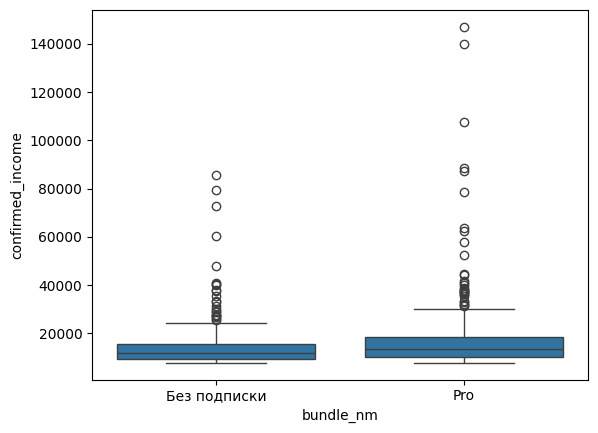

In [663]:
import seaborn as sns

sns.boxplot(x='bundle_nm', y='confirmed_income', data=df)
plt.show()

In [664]:
len(df["confirmed_income"]) - df["confirmed_income"].isna().sum()

961

Количество значений дохода

In [665]:
df_dat = df.copy()

In [666]:
df.groupby('bundle_nm')[['age', 'confirmed_income']].mean()


,age,confirmed_income
bundle_nm,,
Pro,36.340444,17243.379497
Без подписки,39.179442,13707.730426


Почистим от экстра выбросов

In [667]:
Q1 = df['confirmed_income'].quantile(0.25)
Q3 = df['confirmed_income'].quantile(0.75)

IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[df['confirmed_income'] <= upper_bound]

In [668]:
upper_bound

26709.010000000002

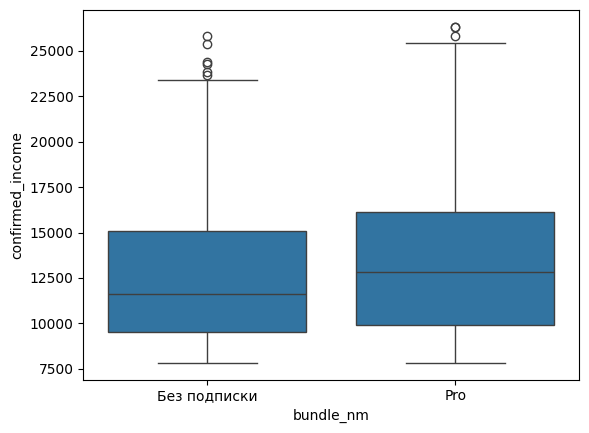

In [669]:
sns.boxplot(x='bundle_nm', y='confirmed_income', data=df_filtered)
plt.show()

In [670]:
df_filtered.shape

(893, 34)

По итогу не чистим выбросы, так как удаляется 18к значений

In [671]:
df.groupby('bundle_nm')[['age', 'confirmed_income']].mean()


,age,confirmed_income
bundle_nm,,
Pro,36.340444,17243.379497
Без подписки,39.179442,13707.730426


In [672]:
df.head()

,customer_id,age,gender_cd,region_size,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,partnership_flg,child_amt,...,emp_gender_cd,emp_children_cnt,emp_work_months_cnt,emp_citizenship_country_cd,emp_marital_status_cd,day_of_week,holiday_flg,million_city,child_flg,approval_flg
0,139895392,42.0,1.0,msk,0.0,0.0,1.0,0.0,1.0,0.0,...,NaN,NaN,0.0,NaN,NaN,2,0,1.0,0,0
2,104017416,30.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,6,1,NaN,0,0
3,579880064,65.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,4,0,NaN,0,0
4,124379737,28.0,1.0,msk,0.0,0.0,1.0,0.0,1.0,1.0,...,NaN,NaN,0.0,NaN,NaN,4,0,1.0,1,0
5,505902204,19.0,1.0,town,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,NaN,1.0,Россия,Холост/не замужем,0,0,0.0,0,1


In [673]:
df.emp_marital_status_cd.value_counts()

emp_marital_status_cd
Холост/не замужем    1439
Женат/замужем         121
Разведен (а)           24
Name: count, dtype: int64

In [674]:
df = df[df["emp_marital_status_cd"] != "Разведен (а)"]

In [675]:
df.emp_marital_status_cd.value_counts()

emp_marital_status_cd
Холост/не замужем    1439
Женат/замужем         121
Name: count, dtype: int64

In [676]:
df["emp_marital_status_cd"] = df["emp_marital_status_cd"].replace({"Холост/не замужем": 0, "Женат/замужем": 1})

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25940\3443373547.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["emp_marital_status_cd"] = df["emp_marital_status_cd"].replace({"Холост/не замужем": 0, "Женат/замужем": 1})


In [677]:
df_encoded = df.copy()

# Выбираем признаки для модели
X = df_encoded.drop(columns=['functional_cd', 'bundle_nm', "region_size", "realty_type", "segment_cd", "product_cd", "finish_dttm", "wo_hit_status_result_desc",
                              "wo_hit_status_reason_desc", "emp_citizenship_country_cd", "emp_children_cnt"], axis=1)

(X.isna().sum() / X.shape[0]).sort_values()[::-1]

confirmed_income         0.936003
emp_marital_status_cd    0.895896
predicted_income         0.792726
traveler_flg             0.410744
million_city             0.410744
partnership_flg          0.410744
child_amt                0.410744
auto_flg                 0.410744
foreign_flg              0.410744
entrepreneur_flg         0.410744
emp_gender_cd            0.128395
emp_work_months_cnt      0.095896
state_talk_time_sec      0.005939
emp_age                  0.000067
emp_age_new              0.000067
gender_cd                0.000000
age                      0.000000
approval_flg             0.000000
child_flg                0.000000
employee_id              0.000000
day_of_week              0.000000
holiday_flg              0.000000
customer_id              0.000000
dtype: float64

In [678]:
df["bundle_flg"] = df["bundle_nm"].replace({"Pro": 1, "Без подписки": 0})

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25940\925317655.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["bundle_flg"] = df["bundle_nm"].replace({"Pro": 1, "Без подписки": 0})


In [679]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data_cl = df[['age', 'confirmed_income', 'child_amt', 'bundle_flg', "approval_flg", "emp_age_new", "emp_work_months_cnt"]].dropna().copy()
print(len(data_cl))

# Преобразуем данные в подходящий формат для кластеризации
X_cluster = data_cl

scaler = StandardScaler()

# Стандартизируем данные
X_cluster_scaled = scaler.fit_transform(X_cluster)

# Кластеризация с использованием K-means
kmeans = KMeans(n_clusters=3, random_state=42)
data_cl['cluster'] = kmeans.fit_predict(X_cluster_scaled)

# Посмотрим на результаты кластеризации
print(data_cl.groupby('cluster').mean())


744
               age  confirmed_income  child_amt  bundle_flg  approval_flg  \
cluster                                                                     
0        34.361446      13168.411084   0.135542    0.000000      0.090361   
1        31.961686      18915.814215   0.134100    0.992337      0.072797   
2        42.456954      15270.760464   1.437086    0.443709      0.132450   

         emp_age_new  emp_work_months_cnt  
cluster                                    
0          37.105422            26.024096  
1          35.532567            26.540230  
2          29.185430            14.172185  


Посмотрим статзначимость по доходу

In [680]:
df["upper_median"] = (df["confirmed_income"] > df["confirmed_income"].median()).astype(float)

In [681]:
from scipy.stats import chi2_contingency, fisher_exact
filtered_data = df.copy()
# filtered_data = df[df['functional_cd'].isin(['Meeting', 'Upsell'])]
grouped = filtered_data.groupby(['functional_cd', 'upper_median', 'bundle_nm']).size().reset_index(name='group_size')

valid_combinations = grouped[['upper_median', 'functional_cd']]
filtered_valid_data = filtered_data.merge(valid_combinations, on=['upper_median', 'functional_cd'])
filtered_valid_data

,customer_id,age,gender_cd,region_size,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,partnership_flg,child_amt,...,emp_work_months_cnt,emp_citizenship_country_cd,emp_marital_status_cd,day_of_week,holiday_flg,million_city,child_flg,approval_flg,bundle_flg,upper_median
0,139895392,42.0,1.0,msk,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,NaN,NaN,2,0,1.0,0,0,0,0.0
1,139895392,42.0,1.0,msk,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,NaN,NaN,2,0,1.0,0,0,0,0.0
2,104017416,30.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6,1,NaN,0,0,0,0.0
3,104017416,30.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6,1,NaN,0,0,0,0.0
4,579880064,65.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4,0,NaN,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29965,191420290,48.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,1,0,NaN,0,0,0,0.0
29966,211662819,54.0,1.0,msk,0.0,1.0,0.0,0.0,1.0,0.0,...,10.0,NaN,NaN,2,0,1.0,0,0,0,0.0
29967,211662819,54.0,1.0,msk,0.0,1.0,0.0,0.0,1.0,0.0,...,10.0,NaN,NaN,2,0,1.0,0,0,0,0.0
29968,265881723,35.0,0.0,town,0.0,0.0,0.0,0.0,0.0,0.0,...,42.0,NaN,NaN,4,0,0.0,0,0,0,0.0


In [682]:
from scipy.stats import fisher_exact, chi2_contingency
from statsmodels.stats.multitest import multipletests
import pandas as pd

results = []

# Цикл по группам
for (reason, product), group in filtered_valid_data.groupby(["functional_cd", "upper_median"]):
    # Таблица сопряженности
    contingency_table = pd.crosstab(group['bundle_nm'], group['approval_flg'])
    # Выбор теста (хи-квадрат или Фишера)
    if contingency_table.values.min() < 5:
        # Точный тест Фишера
        stat, p_value = fisher_exact(contingency_table, alternative='two-sided')
        test_type = 'Fisher'
    else:
        # Тест хи-квадрат
        stat, p_value, _, _ = chi2_contingency(contingency_table)
        test_type = 'Chi2'
    
    # Сохранение результата
    results.append({
        'reason': reason,
        'upper_median': product,
        'test': test_type,
        'p_value': p_value
    })

# Конвертация результатов в DataFrame
results_df = pd.DataFrame(results)

# Применение поправки (например, метод Холма)
adjusted_p_values = multipletests(results_df['p_value'], method='fdr_bh')[1]

# Добавление скорректированных p-значений в DataFrame
results_df['adjusted_p_value'] = adjusted_p_values
results_df['significant_after_correction'] = results_df['adjusted_p_value'] < 0.05

# Вывод результатов
results_df


,reason,upper_median,test,p_value,adjusted_p_value,significant_after_correction
0,Afterfilling,0.0,Chi2,0.077443,0.180540,False
1,Afterfilling,1.0,Fisher,0.430018,0.737173,False
2,Cold,0.0,Chi2,0.000058,0.000345,True
3,Cold,1.0,Fisher,1.000000,1.000000,False
4,Meeting,0.0,Chi2,0.090270,0.180540,False
5,Meeting,1.0,Fisher,1.000000,1.000000,False
6,Preapprove,0.0,Chi2,0.002973,0.010665,True
7,Preapprove,1.0,Chi2,0.859029,1.000000,False
8,Upsell,0.0,Chi2,0.003555,0.010665,True
9,Upsell,1.0,Chi2,0.559870,0.839804,False


In [683]:
from scipy.stats import chi2_contingency, fisher_exact
filtered_data = df.copy()
# filtered_data = df[df['functional_cd'].isin(['Meeting', 'Upsell'])]
grouped = filtered_data.groupby(['functional_cd', 'partnership_flg', 'bundle_nm']).size().reset_index(name='group_size')

valid_combinations = grouped[['partnership_flg', 'functional_cd']]
filtered_valid_data = filtered_data.merge(valid_combinations, on=['partnership_flg', 'functional_cd'])
filtered_valid_data

,customer_id,age,gender_cd,region_size,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,partnership_flg,child_amt,...,emp_work_months_cnt,emp_citizenship_country_cd,emp_marital_status_cd,day_of_week,holiday_flg,million_city,child_flg,approval_flg,bundle_flg,upper_median
0,139895392,42.0,1.0,msk,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,NaN,NaN,2,0,1.0,0,0,0,0.0
1,139895392,42.0,1.0,msk,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,NaN,NaN,2,0,1.0,0,0,0,0.0
2,124379737,28.0,1.0,msk,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,NaN,NaN,4,0,1.0,1,0,0,0.0
3,124379737,28.0,1.0,msk,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,NaN,NaN,4,0,1.0,1,0,0,0.0
4,505902204,19.0,1.0,town,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,Россия,0.0,0,0,0.0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,305282509,39.0,0.0,urban,0.0,1.0,0.0,0.0,1.0,2.0,...,1.0,NaN,NaN,3,0,1.0,1,1,0,0.0
17656,211662819,54.0,1.0,msk,0.0,1.0,0.0,0.0,1.0,0.0,...,10.0,NaN,NaN,2,0,1.0,0,0,0,0.0
17657,211662819,54.0,1.0,msk,0.0,1.0,0.0,0.0,1.0,0.0,...,10.0,NaN,NaN,2,0,1.0,0,0,0,0.0
17658,265881723,35.0,0.0,town,0.0,0.0,0.0,0.0,0.0,0.0,...,42.0,NaN,NaN,4,0,0.0,0,0,0,0.0


In [684]:
from scipy.stats import fisher_exact, chi2_contingency
from statsmodels.stats.multitest import multipletests
import pandas as pd

results = []

# Цикл по группам
for (reason, product), group in filtered_valid_data.groupby(["functional_cd", "partnership_flg"]):
    # Таблица сопряженности
    contingency_table = pd.crosstab(group['bundle_nm'], group['approval_flg'])
    # Выбор теста (хи-квадрат или Фишера)
    if contingency_table.values.min() < 5:
        # Точный тест Фишера
        stat, p_value = fisher_exact(contingency_table, alternative='two-sided')
        test_type = 'Fisher'
    else:
        # Тест хи-квадрат
        stat, p_value, _, _ = chi2_contingency(contingency_table)
        test_type = 'Chi2'
    
    # Сохранение результата
    results.append({
        'reason': reason,
        'partnership_flg': product,
        'test': test_type,
        'p_value': p_value
    })

# Конвертация результатов в DataFrame
results_df = pd.DataFrame(results)

# Применение поправки (например, метод Холма)
adjusted_p_values = multipletests(results_df['p_value'], method='fdr_bh')[1]

# Добавление скорректированных p-значений в DataFrame
results_df['adjusted_p_value'] = adjusted_p_values
results_df['significant_after_correction'] = results_df['adjusted_p_value'] < 0.05

# Вывод результатов
results_df


,reason,partnership_flg,test,p_value,adjusted_p_value,significant_after_correction
0,Afterfilling,0.0,Chi2,0.608744,0.692339,False
1,Afterfilling,1.0,Chi2,0.634644,0.692339,False
2,Cold,0.0,Chi2,1.000000,1.000000,False
3,Cold,1.0,Chi2,0.530979,0.692339,False
4,Meeting,0.0,Chi2,0.009160,0.021983,True
5,Meeting,1.0,Chi2,0.000027,0.000320,True
6,Preapprove,0.0,Chi2,0.196056,0.294084,False
7,Preapprove,1.0,Chi2,0.002176,0.011933,True
8,Upsell,0.0,Chi2,0.130015,0.222883,False
9,Upsell,1.0,Chi2,0.002983,0.011933,True


In [685]:
df.columns

Index(['customer_id', 'age', 'gender_cd', 'region_size', 'foreign_flg',
       'entrepreneur_flg', 'auto_flg', 'traveler_flg', 'partnership_flg',
       'child_amt', 'realty_type', 'segment_cd', 'bundle_nm',
       'confirmed_income', 'predicted_income', 'product_cd', 'functional_cd',
       'finish_dttm', 'state_talk_time_sec', 'wo_hit_status_result_desc',
       'wo_hit_status_reason_desc', 'employee_id', 'emp_age', 'emp_age_new',
       'emp_gender_cd', 'emp_children_cnt', 'emp_work_months_cnt',
       'emp_citizenship_country_cd', 'emp_marital_status_cd', 'day_of_week',
       'holiday_flg', 'million_city', 'child_flg', 'approval_flg',
       'bundle_flg', 'upper_median'],
      dtype='object')

In [686]:
(df[["confirmed_income", "emp_age_new", "upper_median", "bundle_nm"]].isna().sum() / X.shape[0]).sort_values()[::-1]

confirmed_income    0.936003
emp_age_new         0.000067
bundle_nm           0.000000
upper_median        0.000000
dtype: float64

In [687]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

df_encoded = df[["age", "gender_cd", "confirmed_income", "emp_age_new", "upper_median", "bundle_flg"]].dropna()

# Выбираем признаки для модели
X = df_encoded[["age", "gender_cd", "confirmed_income", "emp_age_new", "upper_median"]]
y = df_encoded['bundle_flg']


# Добавление взаимодействий
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
X_interactions = poly.fit_transform(X.dropna())

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_interactions, y, test_size=0.2, random_state=42)

# Строим модель
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Оценка модели
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.63      0.85      0.72       112
           1       0.59      0.30      0.40        80

    accuracy                           0.62       192
   macro avg       0.61      0.57      0.56       192
weighted avg       0.61      0.62      0.59       192



C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [688]:
df_encoded = df[["age", "gender_cd", "confirmed_income", "emp_age_new", "upper_median", "bundle_flg"]].dropna()
X = df_encoded[["age", "gender_cd", "confirmed_income", "emp_age_new", "upper_median"]]
y = df_encoded['bundle_flg']

print(X.dtypes)
print(y.unique())


age                 float64
gender_cd           float64
confirmed_income    float64
emp_age_new         float64
upper_median        float64
dtype: object
[0 1]


In [689]:
import statsmodels.api as sm

df_encoded = df[["age", "gender_cd", "confirmed_income", "emp_age_new", "upper_median", "bundle_flg"]].dropna()

# Выбираем признаки для модели
X = df_encoded[["age", "gender_cd", "confirmed_income", "emp_age_new", "upper_median"]]
y = df_encoded['bundle_flg']

X_with_const = sm.add_constant(X)

# Построение логит-модели
logit_model = sm.Logit(y, X_with_const)
logit_result = logit_model.fit()

# Результаты модели
print(logit_result.summary())


Optimization terminated successfully.
         Current function value: 0.650356
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             bundle_flg   No. Observations:                  959
Model:                          Logit   Df Residuals:                      953
Method:                           MLE   Df Model:                            5
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.04064
Time:                        23:33:48   Log-Likelihood:                -623.69
converged:                       True   LL-Null:                       -650.11
Covariance Type:            nonrobust   LLR p-value:                 3.621e-10
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2216      0.333      0.665      0.506      -0.431       0.874
age        

In [690]:
import statsmodels.formula.api as smf

# Модель с фиксированными эффектами для причины и продукта
model = smf.logit("approval_flg ~ bundle_nm + C(functional_cd)", data=filtered_valid_data)
result = model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.322073
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           approval_flg   No. Observations:                17660
Model:                          Logit   Df Residuals:                    17653
Method:                           MLE   Df Model:                            6
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                  0.1522
Time:                        23:33:48   Log-Likelihood:                -5687.8
converged:                       True   LL-Null:                       -6709.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -1.8791      0.063    -30.012  

In [691]:
df[(df['product_cd'] == 'Debit Cards') & (df['bundle_flg'] == 1)].shape[0]

142

In [692]:
for product, group in filtered_valid_data[filtered_valid_data["product_cd"] == "Debit Cards"].groupby("product_cd"):
    contingency_table = pd.crosstab(group['bundle_flg'], group['approval_flg'])
    print(contingency_table.reset_index())

approval_flg  bundle_flg    0    1
0                      0  418  460
1                      1   84   90


# Работа с бакетами

In [693]:
df = pd.read_csv('data_final_preprocessed.csv')

In [694]:
import scipy.stats as stats
import statsmodels.api as sm


In [695]:
df = df[df['bundle_nm'].isin(['Без подписки', 'Pro'])]
df['pro_flg'] = df['bundle_nm'].map({'Без подписки': 0, 'Pro': 1})

In [696]:
sales_group = ['Cold', 'Upsell', 'Downsell', 'BAF', 'Personal accident Insurance', 'Utilization']
application_group = ['Agreement', 'Preapprove', 'Afterfilling', 'Activation', 'Prolongation', 'Refinancing']
support_group = ['Autoleads', 'Incoming', 'Verification', 'Meeting', 'Reutilization']
df['group'] = 'Другое'
df.loc[df['functional_cd'].isin(sales_group), 'group'] = 'Продажи'
df.loc[df['functional_cd'].isin(application_group), 'group'] = 'Обработка заявок'
df.loc[df['functional_cd'].isin(support_group), 'group'] = 'Поддержка'


# # Обновленные группы причин звонков
# sales_group = ['Cold', 'Upsell', 'Downsell', 'BAF', 'Personal accident Insurance', 'Refinancing']
# application_group = ['Preapprove', 'Afterfilling', 'Agreement', 'Activation', 'Prolongation', 'Deposit', 'Autoleads']
# support_group = ['Meeting', 'Incoming', 'Verification','Utilization', 'Reutilization']
# df['group'] = 'Другое'
# df.loc[df['functional_cd'].isin(sales_group), 'group'] = 'Продажи'
# df.loc[df['functional_cd'].isin(application_group), 'group'] = 'Обработка заявок'
# df.loc[df['functional_cd'].isin(support_group), 'group'] = 'Поддержка'



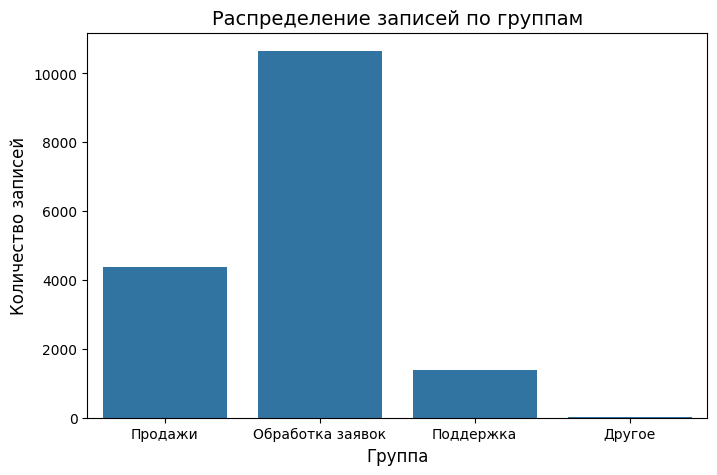

In [697]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='group', order=['Продажи', 'Обработка заявок', 'Поддержка', 'Другое'])
plt.title("Распределение записей по группам", fontsize=14)
plt.xlabel("Группа", fontsize=12)
plt.ylabel("Количество записей", fontsize=12)
plt.show()

In [698]:
d = df.groupby(['group', 'pro_flg'])['approval_flg'].agg(mean='mean', count='count')
d[d['count'] > 30]

mean  count
group            pro_flg                 
Обработка заявок 0        0.068212   8151
                 1        0.083267   2498
Поддержка        0        0.392891   1069
                 1        0.315113    311
Продажи          0        0.186630   3306
                 1        0.149436   1064

In [699]:
results = []
for product, group in df.groupby('group'):
    contingency_table = pd.crosstab(group['bundle_nm'], group['approval_flg'])
    if contingency_table.shape[0] < 2 or contingency_table.shape[1] < 2:
        results.append({
        'product': product,
        'test': 'Нет данных',
        'p_value': None,
        'significant': None
        })
        continue
    if contingency_table.values.min() < 5:
        stat, p_value = stats.fisher_exact(contingency_table, alternative='two-sided')
        test_type = 'Fisher'
    else:
        stat, p_value, _, _ = stats.chi2_contingency(contingency_table)
        test_type = 'Chi2'
        
    results.append({
        'product': product,
        'test': test_type,
        'p_value': p_value,
        'significant': p_value < 0.05
    })
results_df = pd.DataFrame(results)
results_df


,product,test,p_value,significant
0,Другое,Нет данных,NaN,None
1,Обработка заявок,Chi2,0.012194,True
2,Поддержка,Chi2,0.015240,True
3,Продажи,Chi2,0.006623,True


In [700]:
df["upper_median"] = (df["confirmed_income"] > df["confirmed_income"].median()).astype(float)

In [701]:
df.columns

Index(['customer_id', 'age', 'gender_cd', 'region_size', 'foreign_flg',
       'entrepreneur_flg', 'auto_flg', 'traveler_flg', 'partnership_flg',
       'child_amt', 'realty_type', 'segment_cd', 'bundle_nm',
       'confirmed_income', 'predicted_income', 'product_cd', 'functional_cd',
       'finish_dttm', 'state_talk_time_sec', 'wo_hit_status_result_desc',
       'wo_hit_status_reason_desc', 'employee_id', 'emp_age', 'emp_age_new',
       'emp_gender_cd', 'emp_children_cnt', 'emp_work_months_cnt',
       'emp_citizenship_country_cd', 'emp_marital_status_cd', 'day_of_week',
       'holiday_flg', 'million_city', 'child_flg', 'approval_flg', 'pro_flg',
       'group', 'upper_median'],
      dtype='object')

In [702]:
df.groupby("gender_cd")["confirmed_income"].mean()

gender_cd
0.0    13873.854342
1.0    16229.586036
Name: confirmed_income, dtype: float64

In [703]:
df[df["group"] != "Другое"].groupby(["group", "pro_flg"])[["approval_flg", "age", "gender_cd", "million_city", "upper_median", "confirmed_income", "state_talk_time_sec"]].mean()

approval_flg        age  gender_cd  million_city  \
group            pro_flg                                                     
Обработка заявок 0            0.068212  39.580542   0.503497      0.383232   
                 1            0.083267  36.929944   0.557646      0.418125   
Поддержка        0            0.392891  37.733396   0.554724      0.321881   
                 1            0.315113  34.035370   0.668810      0.384615   
Продажи          0            0.186630  38.490381   0.536298      0.313120   
                 1            0.149436  35.289474   0.569549      0.343216   

                          upper_median  confirmed_income  state_talk_time_sec  
group            pro_flg                                                       
Обработка заявок 0            0.018280      13748.002173            67.241507  
                 1            0.072058      17842.904825            79.881356  
Поддержка        0            0.014032      12673.665581           142.539901  
                 1            0.054662      14943.943548           151.316498  
Продажи          0            0.037205      14081.277482           102.410427  
                 1            0.093045      17002.219309           114.293233

[Text(0, 3, '0.00'),
 Text(0, 3, '0.33'),
 Text(0, 3, '0.12'),
 Text(0, 3, '0.33'),
 Text(0, 3, '0.26'),
 Text(0, 3, '0.13'),
 Text(0, 3, '0.14'),
 Text(0, 3, '0.04'),
 Text(0, 3, '0.05'),
 Text(0, 3, '0.00'),
 Text(0, 3, '0.00')]

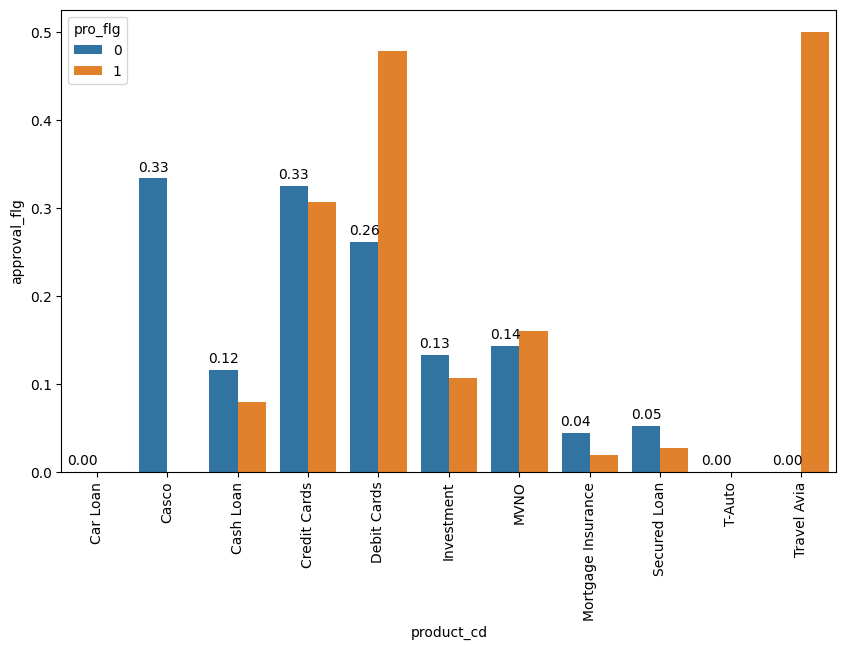

In [704]:
dat = df[df["group"] == "Продажи"].groupby(["product_cd", "pro_flg"])["approval_flg"].mean().reset_index()

# Построение барплота
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=dat, x='product_cd', y='approval_flg', hue='pro_flg')
plt.xticks(rotation=90)

# Добавление подписей значений на столбцы
barplot.bar_label(barplot.containers[0], fmt='%.2f', padding=3)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25940\3473232421.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(data=dat, x='product_cd', y='approval_mean', hue='pro_flg', ci=None)


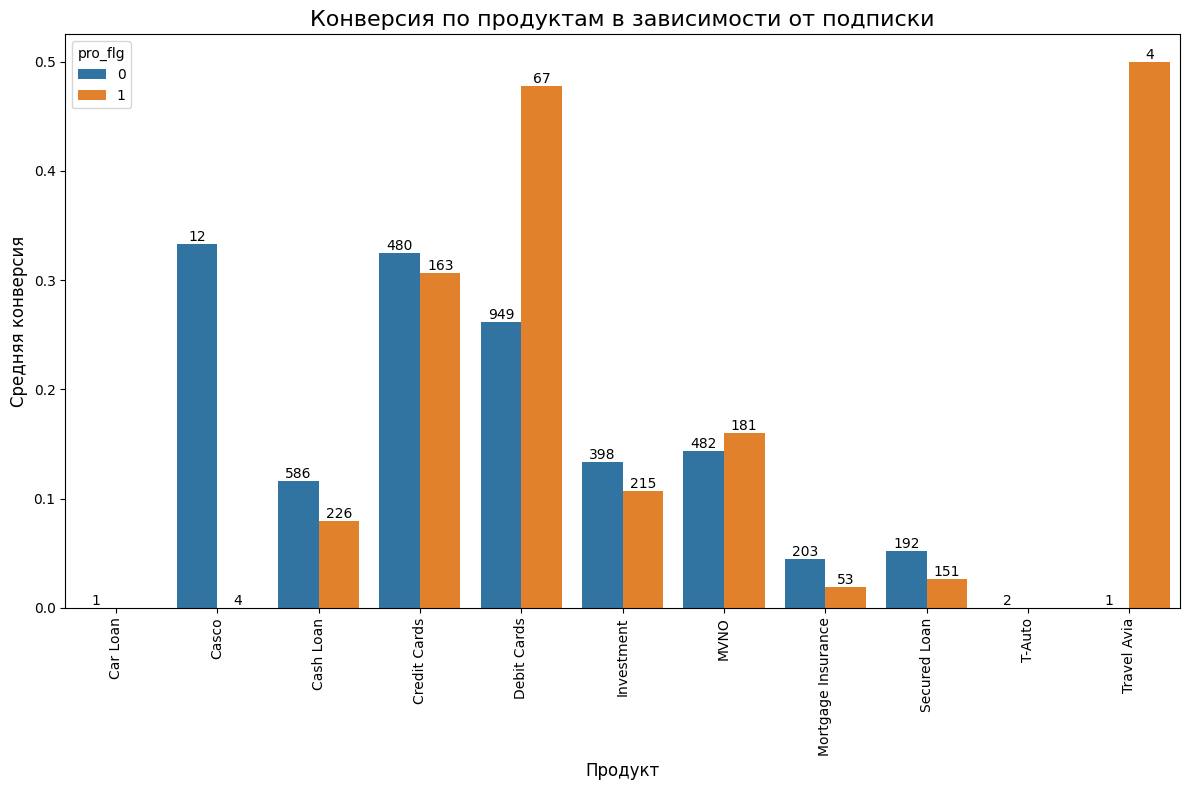

In [705]:
# Подготовка данных
dat = (
    df[df["group"] == "Продажи"]
    .groupby(["product_cd", "pro_flg"])
    .agg(approval_mean=("approval_flg", "mean"), calls_count=("approval_flg", "count"))
    .reset_index()
)

# Построение барплота
plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=dat, x='product_cd', y='approval_mean', hue='pro_flg', ci=None)
plt.xticks(rotation=90)
plt.title("Конверсия по продуктам в зависимости от подписки", fontsize=16)
plt.xlabel("Продукт", fontsize=12)
plt.ylabel("Средняя конверсия", fontsize=12)

# Добавление подписей значений (конверсия и общее число звонков)
for container, pro_flg_group in zip(barplot.containers, dat['pro_flg'].unique()):
    subset = dat[dat['pro_flg'] == pro_flg_group]
    for rect, (_, row) in zip(container, subset.iterrows()):
        calls_count = row['calls_count']
        height = rect.get_height()
        barplot.annotate(
            f"{calls_count}",  # Количество звонков
            (rect.get_x() + rect.get_width() / 2, height),  # Координаты текста
            ha="center",
            va="bottom",
            fontsize=10,
            color="black"
        )

plt.tight_layout()
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_25940\2126060045.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(data=dat, x='product_cd', y='approval_mean', hue='pro_flg', ci=None)


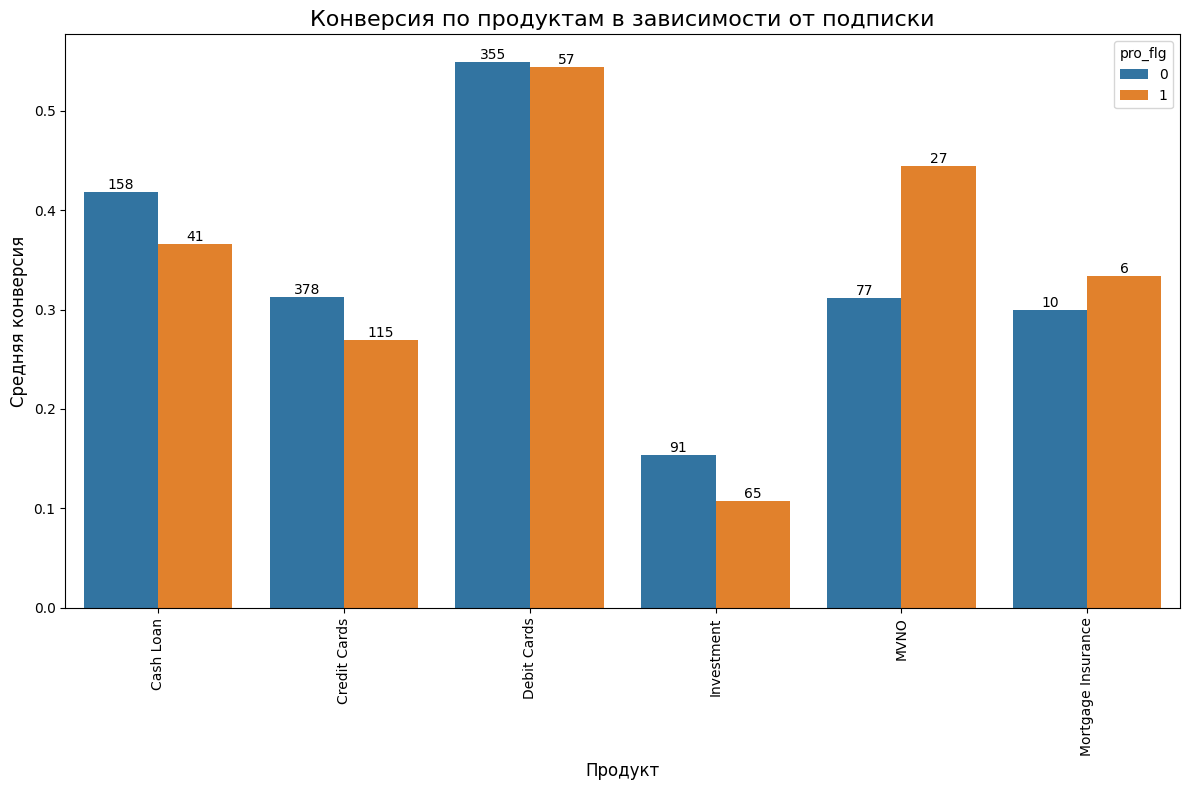

In [706]:
# Подготовка данных
dat = (
    df[df["group"] == "Поддержка"]
    .groupby(["product_cd", "pro_flg"])
    .agg(approval_mean=("approval_flg", "mean"), calls_count=("approval_flg", "count"))
    .reset_index()
)

# Построение барплота
plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=dat, x='product_cd', y='approval_mean', hue='pro_flg', ci=None)
plt.xticks(rotation=90)
plt.title("Конверсия по продуктам в зависимости от подписки", fontsize=16)
plt.xlabel("Продукт", fontsize=12)
plt.ylabel("Средняя конверсия", fontsize=12)

# Добавление подписей значений (конверсия и общее число звонков)
for container, pro_flg_group in zip(barplot.containers, dat['pro_flg'].unique()):
    subset = dat[dat['pro_flg'] == pro_flg_group]
    for rect, (_, row) in zip(container, subset.iterrows()):
        calls_count = row['calls_count']
        height = rect.get_height()
        barplot.annotate(
            f"{calls_count}",  # Количество звонков
            (rect.get_x() + rect.get_width() / 2, height),  # Координаты текста
            ha="center",
            va="bottom",
            fontsize=10,
            color="black"
        )

plt.tight_layout()
plt.show()
